In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report, roc_auc_score, roc_curve,r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv('player_datawithage.csv')

In [3]:
df.head(5)

,Ad,Ülke,Takım,Piyasa Değeri,Pozisyon,Doğum Tarihi,Yaş,Maç,Gol,Asist,Şut/M,İ.Ş/M,Pas,Drip./M,T.K/M,H.T.K/M,İ.M.K,B.P/M,İ.O/M
0,Gabriel Sara,Brezilya,Galatasaray,23.500.000,: Ortasaha,26.06.1999,(25),16,2,5,"1,1","0,4",%83,"0,9","0,8","0,8",%45,38,"1,4"
1,Mauro Icardi,Arjantin,Galatasaray,13.000.000,: Forvet,19.02.1993,(31),7,4,1,"1,4","0,7",%69,"0,0","0,0","1,3",%44,10,"0,0"
2,Victor Osimhen,Nijerya,Galatasaray,75.000.000,: Forvet,29.12.1998,(26),12,10,3,"3,7","1,8",%65,"0,6","0,1","2,4",%51,6,"0,2"
3,Yunus Akgün,Türkiye,Galatasaray,11.500.000,: Forvet,7.07.2000,(24),17,6,5,"1,2","0,8",%80,"1,2","0,4","0,3",%31,18,"0,3"
4,Michy Batshuayi,Belçika,Galatasaray,7.500.000,: Forvet,2.10.1993,(31),16,5,2,"0,9","0,5",%78,"0,2","0,1","0,1",%18,7,"0,0"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791 entries, 0 to 2790
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Ad             2791 non-null   object
 1   Ülke           2648 non-null   object
 2   Takım          2791 non-null   object
 3   Piyasa Değeri  2177 non-null   object
 4   Pozisyon       2715 non-null   object
 5   Doğum Tarihi   2696 non-null   object
 6   Yaş            2700 non-null   object
 7   Maç            2161 non-null   object
 8   Gol            2301 non-null   object
 9   Asist          2310 non-null   object
 10  Şut/M          2153 non-null   object
 11  İ.Ş/M          2234 non-null   object
 12  Pas            2303 non-null   object
 13  Drip./M        2240 non-null   object
 14  T.K/M          2235 non-null   object
 15  H.T.K/M        2231 non-null   object
 16  İ.M.K          2038 non-null   object
 17  B.P/M          1948 non-null   object
 18  İ.O/M          1936 non-null

In [5]:
# Feature isimlerini Türkçeye çevirelim
df.rename(columns={
    'Şut/M': 'Şut/Maç',
    'İ.Ş/M': 'İsabetli_Şut/Maç',
    'Pas': 'Pas(%)',
    'Drip./M': 'Dribbling/Maç',
    'T.K/M': 'Top_Kazanma/Maç',
    'H.T.K/M': 'Hava_Topu_Kazanma/Maç',
    'İ.M.K': 'İkili_Mücadele_Kazanma/Maç(%)',
    'B.P/M': 'Başarılı_Pas/Maç',
    'İ.O/M': 'İsabetli_Orta/Maç',
}, inplace=True)

# Yeni veri setine göz atalım
df.head()


,Ad,Ülke,Takım,Piyasa Değeri,Pozisyon,Doğum Tarihi,Yaş,Maç,Gol,Asist,Şut/Maç,İsabetli_Şut/Maç,Pas(%),Dribbling/Maç,Top_Kazanma/Maç,Hava_Topu_Kazanma/Maç,İkili_Mücadele_Kazanma/Maç(%),Başarılı_Pas/Maç,İsabetli_Orta/Maç
0,Gabriel Sara,Brezilya,Galatasaray,23.500.000,: Ortasaha,26.06.1999,(25),16,2,5,"1,1","0,4",%83,"0,9","0,8","0,8",%45,38,"1,4"
1,Mauro Icardi,Arjantin,Galatasaray,13.000.000,: Forvet,19.02.1993,(31),7,4,1,"1,4","0,7",%69,"0,0","0,0","1,3",%44,10,"0,0"
2,Victor Osimhen,Nijerya,Galatasaray,75.000.000,: Forvet,29.12.1998,(26),12,10,3,"3,7","1,8",%65,"0,6","0,1","2,4",%51,6,"0,2"
3,Yunus Akgün,Türkiye,Galatasaray,11.500.000,: Forvet,7.07.2000,(24),17,6,5,"1,2","0,8",%80,"1,2","0,4","0,3",%31,18,"0,3"
4,Michy Batshuayi,Belçika,Galatasaray,7.500.000,: Forvet,2.10.1993,(31),16,5,2,"0,9","0,5",%78,"0,2","0,1","0,1",%18,7,"0,0"


In [6]:
# Eksik veri kontrolü
print("Eksik değerler:\n", df.isnull().sum())

Eksik değerler:
 Ad                                 0
Ülke                             143
Takım                              0
Piyasa Değeri                    614
Pozisyon                          76
Doğum Tarihi                      95
Yaş                               91
Maç                              630
Gol                              490
Asist                            481
Şut/Maç                          638
İsabetli_Şut/Maç                 557
Pas(%)                           488
Dribbling/Maç                    551
Top_Kazanma/Maç                  556
Hava_Topu_Kazanma/Maç            560
İkili_Mücadele_Kazanma/Maç(%)    753
Başarılı_Pas/Maç                 843
İsabetli_Orta/Maç                855
dtype: int64


In [7]:
# Veri temizleme: Öncelikle sayısal olması gereken sütunlarda virgül (,) yerine nokta (.) kullanımı ve uygun formatlara dönüştürme

# Piyasa Değeri sütunundan '.' gibi karakterleri temizleyip, sayıya dönüştürme
df['Piyasa Değeri'] = (
    df['Piyasa Değeri']
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float, errors='ignore')
)

# Sayısal veri içeren diğer sütunları düzeltme (örneğin, "Şut/Maç", "İsabetli_Şut/Maç" vb.)
columns_to_clean = ['Şut/Maç', 'İsabetli_Şut/Maç','Dribbling/Maç', 'Top_Kazanma/Maç', 'Hava_Topu_Kazanma/Maç', 
                    'İkili_Mücadele_Kazanma/Maç(%)', 'Başarılı_Pas/Maç', 'İsabetli_Orta/Maç', 'Pas(%)', 'Maç','Gol','Asist']
for column in columns_to_clean:
    df[column] = (
        df[column]
        .str.replace(',', '.', regex=False)
        .str.extract(r'([\d.]+)')  # Sayısal değerleri ayıklama
        .astype(float)
    )

# "Yaş" sütunundaki parantezleri temizleyerek sayıya dönüştürme
df['Yaş'] = df['Yaş'].str.extract(r'(\d+)').astype(float)

# Temizlenmiş veriyi kontrol etme
df_cleaned = df.copy()
df_cleaned.info()
df_cleaned.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2791 entries, 0 to 2790
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ad                             2791 non-null   object 
 1   Ülke                           2648 non-null   object 
 2   Takım                          2791 non-null   object 
 3   Piyasa Değeri                  2177 non-null   float64
 4   Pozisyon                       2715 non-null   object 
 5   Doğum Tarihi                   2696 non-null   object 
 6   Yaş                            2700 non-null   float64
 7   Maç                            2161 non-null   float64
 8   Gol                            2301 non-null   float64
 9   Asist                          2301 non-null   float64
 10  Şut/Maç                        2145 non-null   float64
 11  İsabetli_Şut/Maç               2151 non-null   float64
 12  Pas(%)                         2144 non-null   f

,Ad,Ülke,Takım,Piyasa Değeri,Pozisyon,Doğum Tarihi,Yaş,Maç,Gol,Asist,Şut/Maç,İsabetli_Şut/Maç,Pas(%),Dribbling/Maç,Top_Kazanma/Maç,Hava_Topu_Kazanma/Maç,İkili_Mücadele_Kazanma/Maç(%),Başarılı_Pas/Maç,İsabetli_Orta/Maç
0,Gabriel Sara,Brezilya,Galatasaray,23500000.0,: Ortasaha,26.06.1999,25.0,16.0,2.0,5.0,1.1,0.4,83.0,0.9,0.8,0.8,45.0,38.0,1.4
1,Mauro Icardi,Arjantin,Galatasaray,13000000.0,: Forvet,19.02.1993,31.0,7.0,4.0,1.0,1.4,0.7,69.0,0.0,0.0,1.3,44.0,10.0,0.0
2,Victor Osimhen,Nijerya,Galatasaray,75000000.0,: Forvet,29.12.1998,26.0,12.0,10.0,3.0,3.7,1.8,65.0,0.6,0.1,2.4,51.0,6.0,0.2
3,Yunus Akgün,Türkiye,Galatasaray,11500000.0,: Forvet,7.07.2000,24.0,17.0,6.0,5.0,1.2,0.8,80.0,1.2,0.4,0.3,31.0,18.0,0.3
4,Michy Batshuayi,Belçika,Galatasaray,7500000.0,: Forvet,2.10.1993,31.0,16.0,5.0,2.0,0.9,0.5,78.0,0.2,0.1,0.1,18.0,7.0,0.0


In [8]:
# NaN değer içeren satırları silelim
df_cleaned = df_cleaned.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 2789
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ad                             1708 non-null   object 
 1   Ülke                           1708 non-null   object 
 2   Takım                          1708 non-null   object 
 3   Piyasa Değeri                  1708 non-null   float64
 4   Pozisyon                       1708 non-null   object 
 5   Doğum Tarihi                   1708 non-null   object 
 6   Yaş                            1708 non-null   float64
 7   Maç                            1708 non-null   float64
 8   Gol                            1708 non-null   float64
 9   Asist                          1708 non-null   float64
 10  Şut/Maç                        1708 non-null   float64
 11  İsabetli_Şut/Maç               1708 non-null   float64
 12  Pas(%)                         1708 non-null   f

In [9]:
# Pozisyon sütununda "Kaleci" olan oyuncuları filtreleyip çıkarma
df_cleaned = df[~df['Pozisyon'].str.contains("Kaleci", case=False, na=False)]

columns_to_drop = ['Doğum Tarihi']  # Gereksiz kolonlar
df_cleaned = df_cleaned.drop(columns=columns_to_drop, axis=1)

In [10]:
# Virgülleri kaldırıp sayısal verilere dönüştürme işlemi
def remove_commas(value):
    if isinstance(value, str):
        return value.replace(',', '')
    return value

# Veriyi dönüştürelim
columns_to_convert = ['Şut/Maç', 'İsabetli_Şut/Maç','Dribbling/Maç', 'Top_Kazanma/Maç', 'Hava_Topu_Kazanma/Maç', 'İkili_Mücadele_Kazanma/Maç(%)', 'Başarılı_Pas/Maç', 'İsabetli_Orta/Maç', 'Pas(%)','Yaş','Maç','Gol']
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].applymap(remove_commas)

# Sayısal türlere dönüştürelim
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Veri tiplerini kontrol edelim
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526 entries, 0 to 2790
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ad                             2526 non-null   object 
 1   Ülke                           2388 non-null   object 
 2   Takım                          2526 non-null   object 
 3   Piyasa Değeri                  1980 non-null   float64
 4   Pozisyon                       2450 non-null   object 
 5   Yaş                            2437 non-null   float64
 6   Maç                            2020 non-null   float64
 7   Gol                            2085 non-null   float64
 8   Asist                          2084 non-null   float64
 9   Şut/Maç                        2014 non-null   float64
 10  İsabetli_Şut/Maç               2014 non-null   float64
 11  Pas(%)                         2011 non-null   float64
 12  Dribbling/Maç                  2013 non-null   f

In [11]:
# "Asist" sütununu sayısal formata dönüştürme ve eksik değerleri doldurma
df_cleaned['Asist'] = (
    df_cleaned['Asist']
    .astype(str)
    .str.extract(r'(\d+)')  # Sayısal değerleri ayıklama
    .astype(float)  # Float'a dönüştürme
)

# Eksik değerleri ortalama ile doldurma
df_cleaned['Asist'] = df_cleaned['Asist'].fillna(df_cleaned['Asist'].mean())

# Eksik değerlerin tamamen giderilip giderilmediğini kontrol etme
missing_values_final = df_cleaned.isnull().sum()
missing_values_final[missing_values_final > 0]


Ülke                             138
Piyasa Değeri                    546
Pozisyon                          76
Yaş                               89
Maç                              506
Gol                              441
Şut/Maç                          512
İsabetli_Şut/Maç                 512
Pas(%)                           515
Dribbling/Maç                    513
Top_Kazanma/Maç                  512
Hava_Topu_Kazanma/Maç            512
İkili_Mücadele_Kazanma/Maç(%)    570
Başarılı_Pas/Maç                 578
İsabetli_Orta/Maç                590
dtype: int64

In [12]:
df_cleaned.head()

,Ad,Ülke,Takım,Piyasa Değeri,Pozisyon,Yaş,Maç,Gol,Asist,Şut/Maç,İsabetli_Şut/Maç,Pas(%),Dribbling/Maç,Top_Kazanma/Maç,Hava_Topu_Kazanma/Maç,İkili_Mücadele_Kazanma/Maç(%),Başarılı_Pas/Maç,İsabetli_Orta/Maç
0,Gabriel Sara,Brezilya,Galatasaray,23500000.0,: Ortasaha,25.0,16.0,2.0,5.0,1.1,0.4,83.0,0.9,0.8,0.8,45.0,38.0,1.4
1,Mauro Icardi,Arjantin,Galatasaray,13000000.0,: Forvet,31.0,7.0,4.0,1.0,1.4,0.7,69.0,0.0,0.0,1.3,44.0,10.0,0.0
2,Victor Osimhen,Nijerya,Galatasaray,75000000.0,: Forvet,26.0,12.0,10.0,3.0,3.7,1.8,65.0,0.6,0.1,2.4,51.0,6.0,0.2
3,Yunus Akgün,Türkiye,Galatasaray,11500000.0,: Forvet,24.0,17.0,6.0,5.0,1.2,0.8,80.0,1.2,0.4,0.3,31.0,18.0,0.3
4,Michy Batshuayi,Belçika,Galatasaray,7500000.0,: Forvet,31.0,16.0,5.0,2.0,0.9,0.5,78.0,0.2,0.1,0.1,18.0,7.0,0.0


In [13]:
# Eksik veri kontrolü
print("Eksik değerler:\n", df_cleaned.isnull().sum())

Eksik değerler:
 Ad                                 0
Ülke                             138
Takım                              0
Piyasa Değeri                    546
Pozisyon                          76
Yaş                               89
Maç                              506
Gol                              441
Asist                              0
Şut/Maç                          512
İsabetli_Şut/Maç                 512
Pas(%)                           515
Dribbling/Maç                    513
Top_Kazanma/Maç                  512
Hava_Topu_Kazanma/Maç            512
İkili_Mücadele_Kazanma/Maç(%)    570
Başarılı_Pas/Maç                 578
İsabetli_Orta/Maç                590
dtype: int64


In [14]:
# NaN değer içeren satırları silelim
df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 2789
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ad                             1708 non-null   object 
 1   Ülke                           1708 non-null   object 
 2   Takım                          1708 non-null   object 
 3   Piyasa Değeri                  1708 non-null   float64
 4   Pozisyon                       1708 non-null   object 
 5   Doğum Tarihi                   1708 non-null   object 
 6   Yaş                            1708 non-null   float64
 7   Maç                            1708 non-null   float64
 8   Gol                            1708 non-null   float64
 9   Asist                          1708 non-null   float64
 10  Şut/Maç                        1708 non-null   float64
 11  İsabetli_Şut/Maç               1708 non-null   float64
 12  Pas(%)                         1708 non-null   f

In [15]:
# Sütunları kategorik ve sayısal olarak ayırma

# Kategorik sütunlar (string veya object türünde olanlar)
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Sayısal sütunlar (float veya int türünde olanlar)
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Kategorik olmayan ancak numerik olmayan sütunlar
non_categorical_columns = [col for col in df_cleaned.columns if col not in categorical_columns]

categorical_columns, numerical_columns, non_categorical_columns


(['Ad', 'Ülke', 'Takım', 'Pozisyon', 'Doğum Tarihi'],
 ['Piyasa Değeri',
  'Yaş',
  'Maç',
  'Gol',
  'Asist',
  'Şut/Maç',
  'İsabetli_Şut/Maç',
  'Pas(%)',
  'Dribbling/Maç',
  'Top_Kazanma/Maç',
  'Hava_Topu_Kazanma/Maç',
  'İkili_Mücadele_Kazanma/Maç(%)',
  'Başarılı_Pas/Maç',
  'İsabetli_Orta/Maç'],
 ['Piyasa Değeri',
  'Yaş',
  'Maç',
  'Gol',
  'Asist',
  'Şut/Maç',
  'İsabetli_Şut/Maç',
  'Pas(%)',
  'Dribbling/Maç',
  'Top_Kazanma/Maç',
  'Hava_Topu_Kazanma/Maç',
  'İkili_Mücadele_Kazanma/Maç(%)',
  'Başarılı_Pas/Maç',
  'İsabetli_Orta/Maç'])

In [16]:
df_cleaned.nunique()

Ad                               1679
Ülke                               91
Takım                             118
Piyasa Değeri                     151
Pozisyon                            3
Doğum Tarihi                     1446
Yaş                                25
Maç                                27
Gol                                18
Asist                              12
Şut/Maç                            38
İsabetli_Şut/Maç                   22
Pas(%)                             52
Dribbling/Maç                      33
Top_Kazanma/Maç                    26
Hava_Topu_Kazanma/Maç              46
İkili_Mücadele_Kazanma/Maç(%)      63
Başarılı_Pas/Maç                   83
İsabetli_Orta/Maç                  25
dtype: int64

In [17]:
# "Yaş" sütununda "0.0" olan tüm oyuncuları alalım
sifiryasinda = df_cleaned[df_cleaned['Yaş'] == 0.0]
sifiryasinda

,Ad,Ülke,Takım,Piyasa Değeri,Pozisyon,Doğum Tarihi,Yaş,Maç,Gol,Asist,Şut/Maç,İsabetli_Şut/Maç,Pas(%),Dribbling/Maç,Top_Kazanma/Maç,Hava_Topu_Kazanma/Maç,İkili_Mücadele_Kazanma/Maç(%),Başarılı_Pas/Maç,İsabetli_Orta/Maç
1850,Sergi Cardona Bermudez,İspanya,Villarreal,2250000.0,: Defans,30.06.2024,0.0,17.0,1.0,1.0,0.6,0.2,81.0,0.3,1.4,1.4,54.0,28.0,0.8


In [18]:
# Hatalı veriyi düzeltmek (0 yaşını 25 olarak değiştirelim)
df_cleaned.loc[df['Yaş'] == 0, 'Yaş'] = 25

# Veri tipini kontrol edelim
df_cleaned['Yaş'].head()


0    25.0
1    31.0
2    26.0
3    24.0
4    31.0
Name: Yaş, dtype: float64

In [19]:
le = LabelEncoder()
# "Takım", "Ad", "Pozisyon" sütunlarını encode edip yeni sütunlar olarak ekliyoruz
df_cleaned['Ülke_encoded'] = le.fit_transform(df_cleaned['Ülke'])
df_cleaned['Takım_encoded'] = le.fit_transform(df_cleaned['Takım'])
df_cleaned['Pozisyon_encoded'] = le.fit_transform(df_cleaned['Pozisyon'])

# Kodlanmış veri setini kontrol etme
df_cleaned.info()
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 2789
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ad                             1708 non-null   object 
 1   Ülke                           1708 non-null   object 
 2   Takım                          1708 non-null   object 
 3   Piyasa Değeri                  1708 non-null   float64
 4   Pozisyon                       1708 non-null   object 
 5   Doğum Tarihi                   1708 non-null   object 
 6   Yaş                            1708 non-null   float64
 7   Maç                            1708 non-null   float64
 8   Gol                            1708 non-null   float64
 9   Asist                          1708 non-null   float64
 10  Şut/Maç                        1708 non-null   float64
 11  İsabetli_Şut/Maç               1708 non-null   float64
 12  Pas(%)                         1708 non-null   f

C:\Users\cirim\AppData\Local\Temp\ipykernel_8140\3778140207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Ülke_encoded'] = le.fit_transform(df_cleaned['Ülke'])
C:\Users\cirim\AppData\Local\Temp\ipykernel_8140\3778140207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Takım_encoded'] = le.fit_transform(df_cleaned['Takım'])
C:\Users\cirim\AppData\Local\Temp\ipykernel_8140\3778140207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,Ad,Ülke,Takım,Piyasa Değeri,Pozisyon,Doğum Tarihi,Yaş,Maç,Gol,Asist,...,Pas(%),Dribbling/Maç,Top_Kazanma/Maç,Hava_Topu_Kazanma/Maç,İkili_Mücadele_Kazanma/Maç(%),Başarılı_Pas/Maç,İsabetli_Orta/Maç,Ülke_encoded,Takım_encoded,Pozisyon_encoded
0,Gabriel Sara,Brezilya,Galatasaray,23500000.0,: Ortasaha,26.06.1999,25.0,16.0,2.0,5.0,...,83.0,0.9,0.8,0.8,45.0,38.0,1.4,10,53,2
1,Mauro Icardi,Arjantin,Galatasaray,13000000.0,: Forvet,19.02.1993,31.0,7.0,4.0,1.0,...,69.0,0.0,0.0,1.3,44.0,10.0,0.0,3,53,1
2,Victor Osimhen,Nijerya,Galatasaray,75000000.0,: Forvet,29.12.1998,26.0,12.0,10.0,3.0,...,65.0,0.6,0.1,2.4,51.0,6.0,0.2,54,53,1
3,Yunus Akgün,Türkiye,Galatasaray,11500000.0,: Forvet,7.07.2000,24.0,17.0,6.0,5.0,...,80.0,1.2,0.4,0.3,31.0,18.0,0.3,69,53,1
4,Michy Batshuayi,Belçika,Galatasaray,7500000.0,: Forvet,2.10.1993,31.0,16.0,5.0,2.0,...,78.0,0.2,0.1,0.1,18.0,7.0,0.0,7,53,1


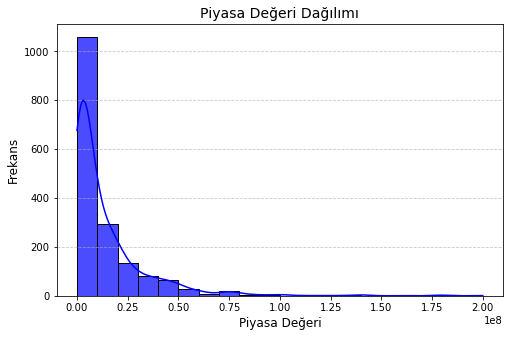

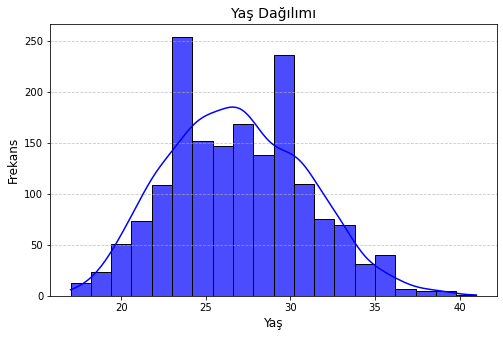

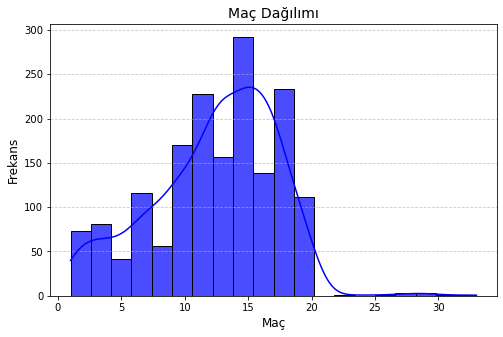

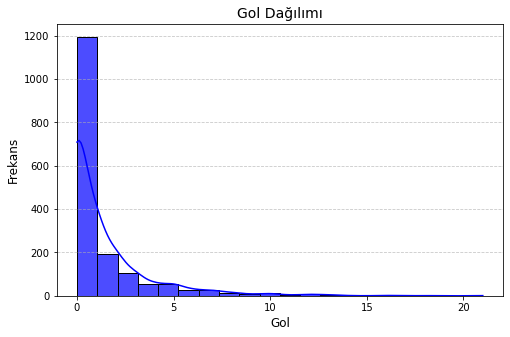

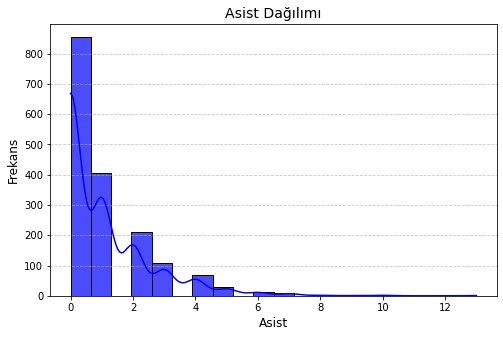

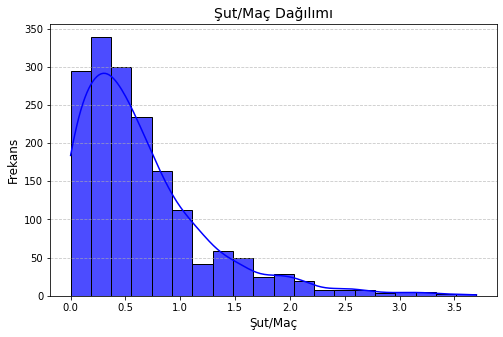

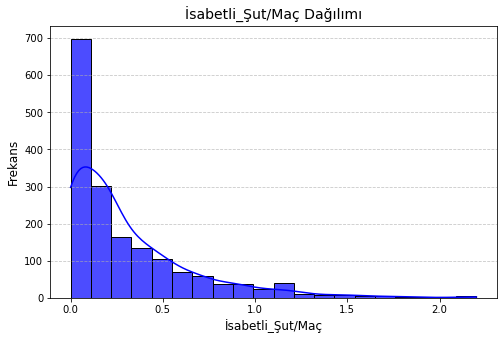

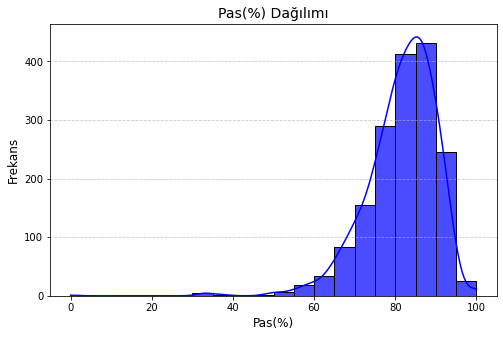

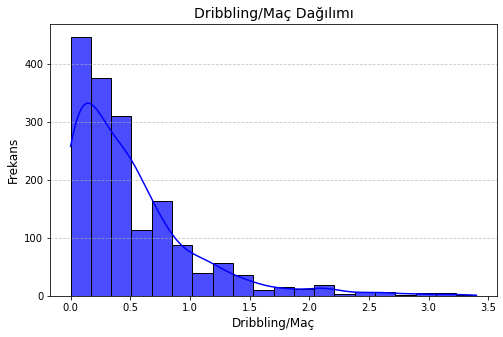

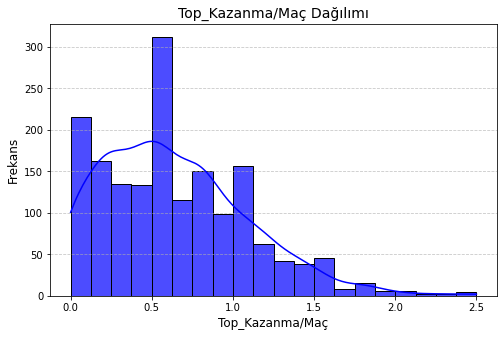

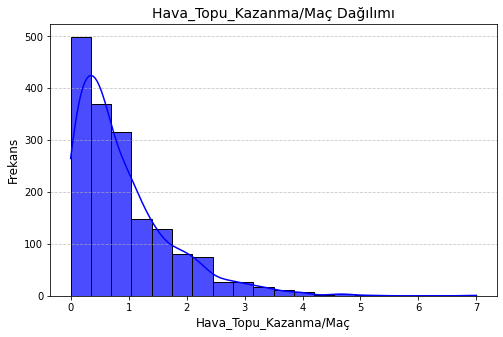

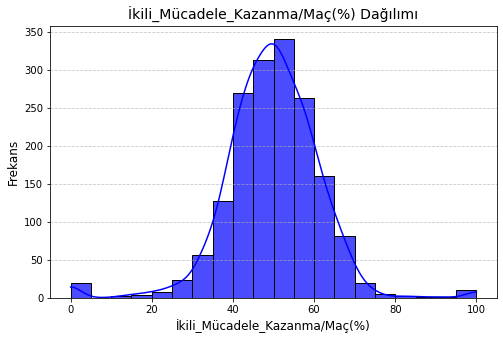

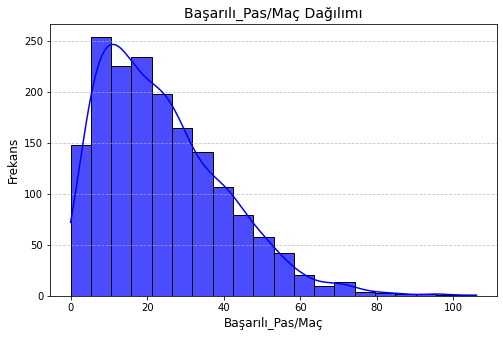

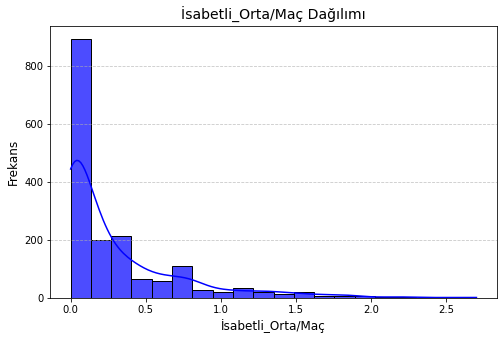

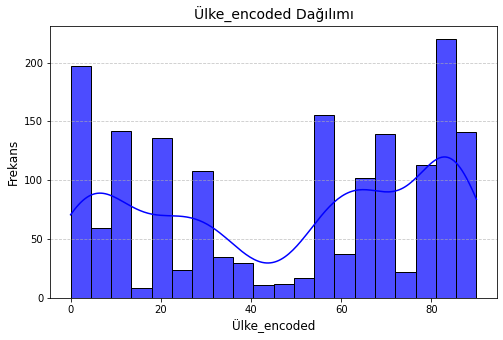

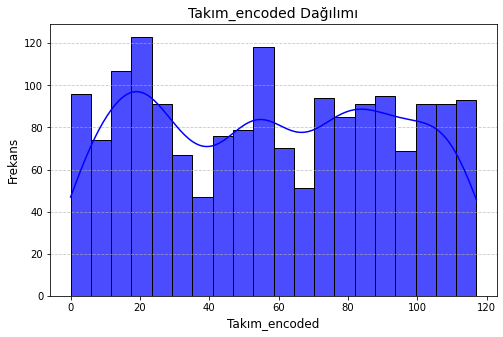

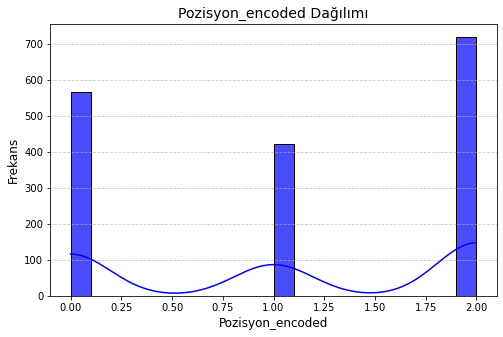

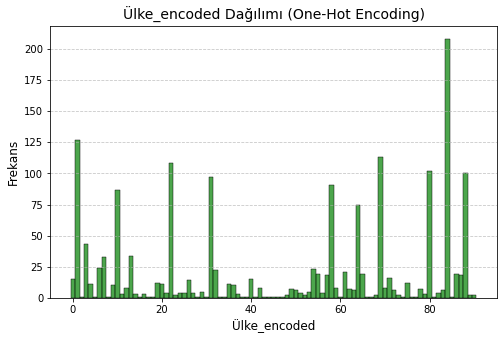

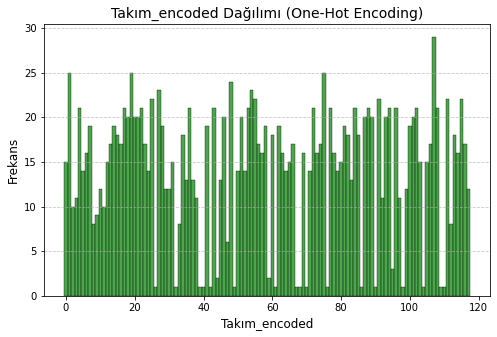

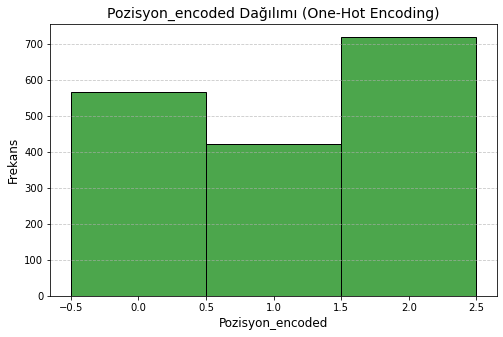

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nümerik sütunları seçme
numerical_columns = df_cleaned.select_dtypes(include=['number']).columns

# One-Hot Encoding ile oluşturulan kategorik sütunları seçme
encoded_columns = df_cleaned.select_dtypes(include=['uint8', 'int64','int32']).columns

# 1. Nümerik Sütunlar İçin Histogramlar
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[column], kde=True, bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'{column} Dağılımı', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frekans', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# 2. One-Hot Encoding ile Oluşan Kategorik Sütunlar İçin Histogramlar
for column in encoded_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_cleaned[column], kde=False, discrete=True, color='green', edgecolor='black', alpha=0.7)
    plt.title(f'{column} Dağılımı (One-Hot Encoding)', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frekans', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


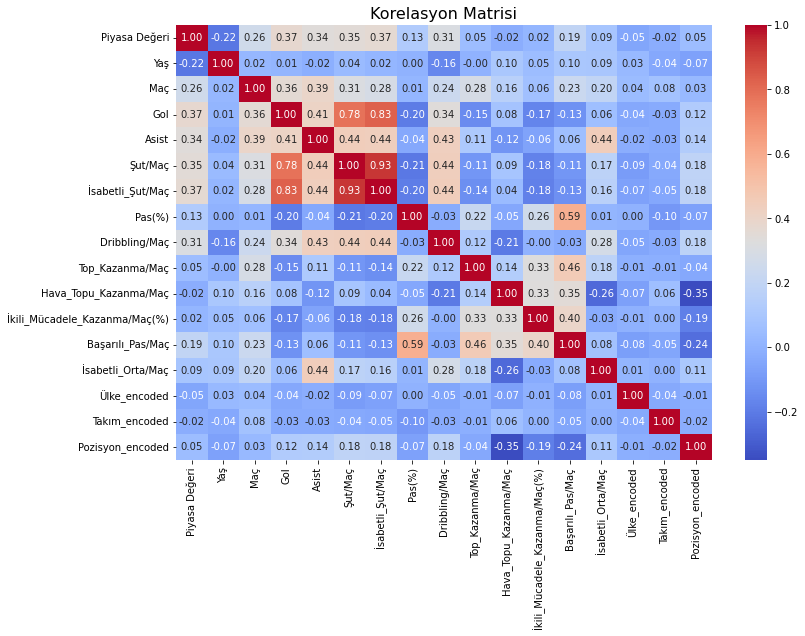

In [21]:

# Korelasyon matrisi
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Korelasyon Matrisi', fontsize=16)
plt.show()


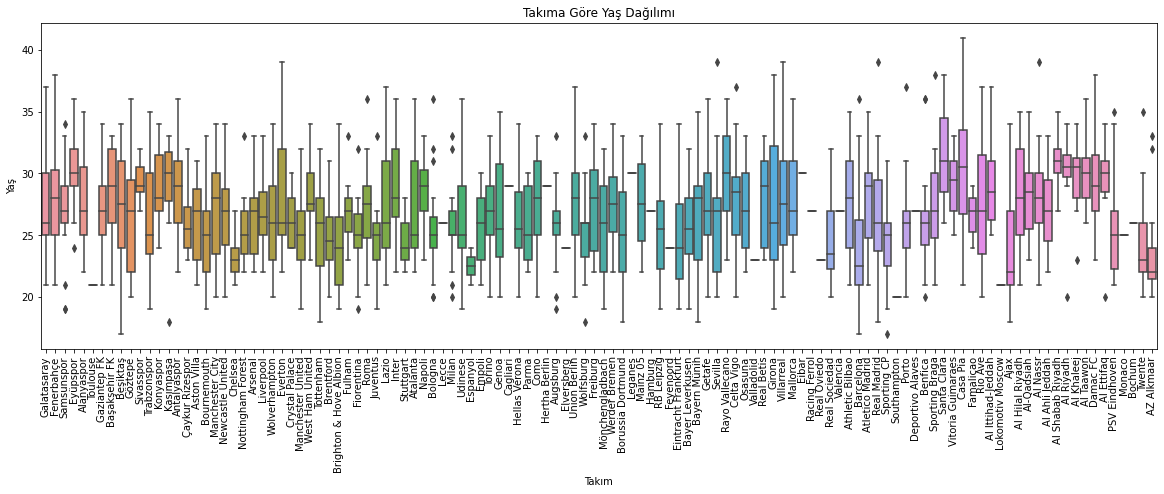

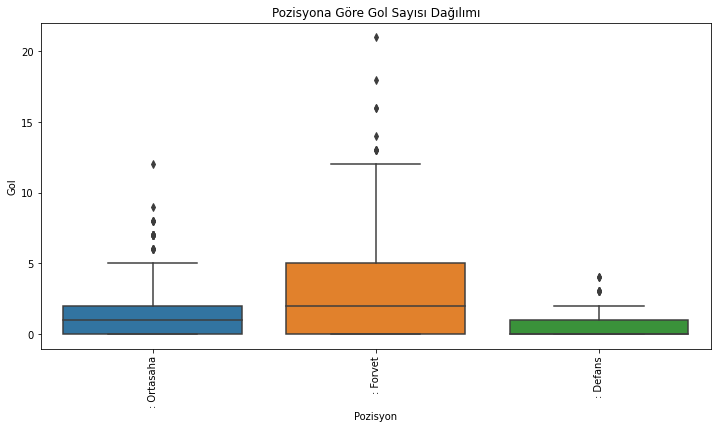

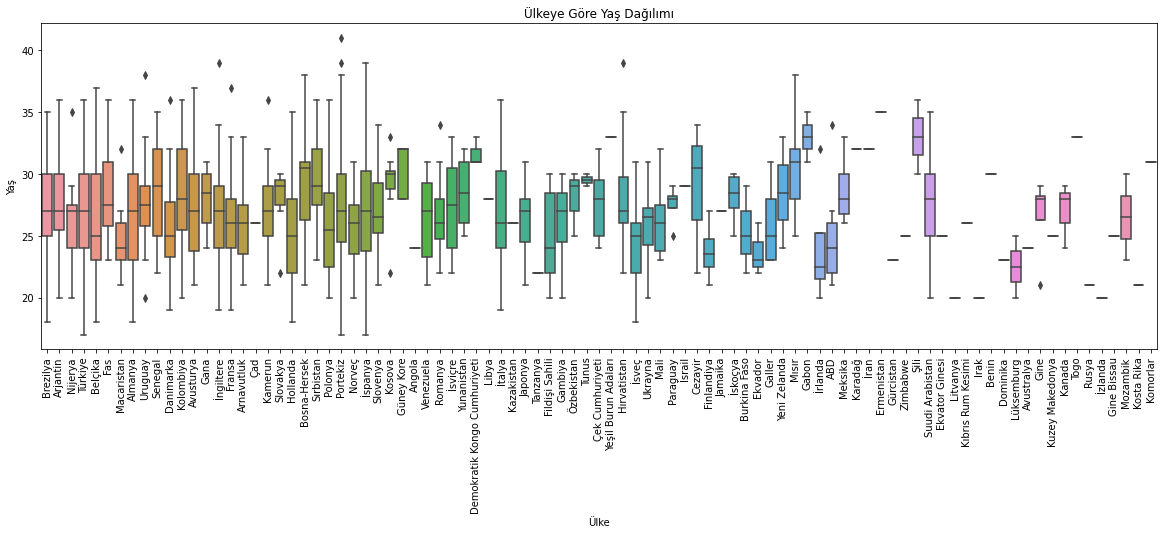

In [22]:
# Kategorik ve sayısal değişkenler arasında boxplot oluşturma

# Takım ve Yaş
plt.figure(figsize=(20, 6))
sns.boxplot(x='Takım', y='Yaş', data=df_cleaned)
plt.title('Takıma Göre Yaş Dağılımı')
plt.xticks(rotation=90)  # X eksenindeki etiketleri döndürme
plt.show()

# Pozisyon ve Gol
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pozisyon', y='Gol', data=df_cleaned)
plt.title('Pozisyona Göre Gol Sayısı Dağılımı')
plt.xticks(rotation=90)  # X eksenindeki etiketleri döndürme
plt.show()

# Ülke ve Yaş
plt.figure(figsize=(20, 6))
sns.boxplot(x='Ülke', y='Yaş', data=df_cleaned)
plt.title('Ülkeye Göre Yaş Dağılımı')
plt.xticks(rotation=90)  # X eksenindeki etiketleri döndürme
plt.show()


C:\Users\cirim\AppData\Local\Temp\ipykernel_8140\2134388308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Piyasa Değeri (Log)'] = np.log1p(df_cleaned['Piyasa Değeri'])


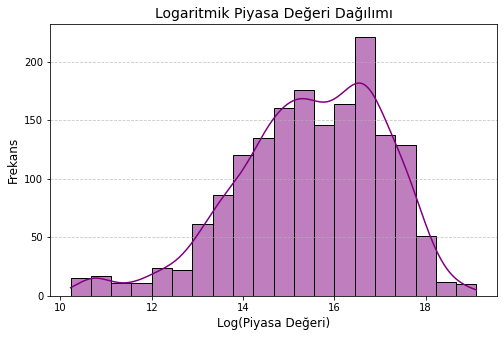

In [23]:
# Piyasa Değeri sütununa logaritmik dönüşüm uygulama
df_cleaned['Piyasa Değeri (Log)'] = np.log1p(df_cleaned['Piyasa Değeri'])

# Log dönüşüm sonrası dağılımı görselleştirme
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Piyasa Değeri (Log)'], bins=20, kde=True, color='purple')
plt.title('Logaritmik Piyasa Değeri Dağılımı', fontsize=14)
plt.xlabel('Log(Piyasa Değeri)', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [24]:
from sklearn.model_selection import train_test_split

# Hedef değişken ve bağımsız değişkenler
X = df_cleaned.drop(columns=['Ad','Piyasa Değeri', 'Piyasa Değeri (Log)','Doğum Tarihi','Ülke','Pozisyon','Takım'])
y = df_cleaned['Piyasa Değeri (Log)']

# Veri setini eğitim ve test olarak ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bölünmüş veri setini kontrol etme
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1366, 16), (342, 16), (1366,), (342,))

In [25]:
from xgboost import XGBRegressor
# XGBoost modelini oluşturma ve eğitme
xgb_model = XGBRegressor(random_state=22, n_estimators=200, learning_rate=0.2, max_depth = 5)
xgb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_xgb = xgb_model.predict(X_test)

# Performans Değerlendirmesi
print("XGBRegressor")
print("R-squared:", r2_score(y_test, y_pred_xgb))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_xgb))

# Assuming you have trained your model and obtained predictions on the testing dataset
predictions_xgb = y_pred_xgb

# Create a new DataFrame for predictions and actual values
results_df = pd.DataFrame({'Predicted Market Value (Random Forest)': predictions_xgb,
                           'Actual Market Value': y_test,
                           'Oyuncu Adı': df.loc[y_test.index, 'Ad']})

results_df.head(5)

XGBRegressor
R-squared: 0.8540523148332888
Mean Squared Error: 1.237239567966602
Mean Absolute Error: 0.8609471245743366


,Predicted Market Value (Random Forest),Actual Market Value,Oyuncu Adı
630,16.494743,16.860033,Carlos Augusto
1926,14.577964,18.258162,Gavi
1957,16.791485,18.315320,Julian Alvarez
131,13.713535,13.217675,Ogün Özçiçek
501,16.587694,17.622173,Mohammed Kudus


In [26]:
# RandomForestRegressor Modeli
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)
y_pred_regr = regr.predict(X_test)

# Performans Değerlendirmesi
print("RandomForestRegressor")
print("R-squared:", r2_score(y_test, y_pred_regr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_regr))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_regr))

# Assuming you have trained your model and obtained predictions on the testing dataset
predictions_forest = y_pred_regr

# Create a new DataFrame for predictions and actual values
results_df = pd.DataFrame({'Predicted Market Value (Random Forest)': predictions_forest,
                           'Actual Market Value': y_test,
                           'Oyuncu Adı': df.loc[y_test.index, 'Ad']})

results_df.head(5)

RandomForestRegressor
R-squared: 0.8373107298629797
Mean Squared Error: 1.2790047621095662
Mean Absolute Error: 0.8967912795549277


,Predicted Market Value (Random Forest),Actual Market Value,Oyuncu Adı
630,15.858603,16.860033,Carlos Augusto
1926,14.923073,18.258162,Gavi
1957,16.532977,18.315320,Julian Alvarez
131,14.435734,13.217675,Ogün Özçiçek
501,16.589976,17.622173,Mohammed Kudus


In [27]:
from sklearn.impute import SimpleImputer
# ... (Your existing code for loading and preprocessing data) ...

# Assuming X_train and y_train are your training data
# Create an imputer to replace NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Now you can fit the Linear Regression model on the imputed data
lr = LinearRegression()
lr.fit(X_train_imputed, y_train)

# To predict on your test data, you need to transform it using the same imputer
X_test_imputed = imputer.transform(X_test)  # Use transform, not fit_transform
y_pred_lr = lr.predict(X_test_imputed)

# Performans Değerlendirmesi
print("Linear Regression")
print("R-squared:", r2_score(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))

Linear Regression
R-squared: 0.6551900228359782
Mean Squared Error: 1.7333408778313617


In [28]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt_reg = dt_reg.predict(X_test)

# Performans Değerlendirmesi
print("Decision Tree Regressor")
print("R-squared:", r2_score(y_test, y_pred_dt_reg))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt_reg))

Decision Tree Regressor
R-squared: 0.29391143537076136
Mean Squared Error: 2.6346217524881217


In [29]:
# Performans metriklerini saklamak için bir sözlük
performance = {
    'Model': [],
    'R2 Score': [],
    'Mean Squared Error': [],
    'Mean Absolute Error': []
}

# XGBoost Performansı
performance['Model'].append('XGBoost')
performance['R2 Score'].append(r2_score(y_test, y_pred_xgb))
performance['Mean Squared Error'].append(mean_squared_error(y_test, y_pred_xgb))
performance['Mean Absolute Error'].append(mean_absolute_error(y_test, y_pred_xgb))

# Random Forest Performansı
performance['Model'].append('Random Forest')
performance['R2 Score'].append(r2_score(y_test, y_pred_regr))
performance['Mean Squared Error'].append(mean_squared_error(y_test, y_pred_regr))
performance['Mean Absolute Error'].append(mean_absolute_error(y_test, y_pred_regr))

# Decision Tree Regressor Performansı
performance['Model'].append('Decision Tree')
performance['R2 Score'].append(r2_score(y_test, y_pred_dt_reg))
performance['Mean Squared Error'].append(mean_squared_error(y_test, y_pred_dt_reg))
performance['Mean Absolute Error'].append(mean_absolute_error(y_test, y_pred_dt_reg))

# Linear Regression Performansı
performance['Model'].append('Linear Regression')
performance['R2 Score'].append(r2_score(y_test, y_pred_lr))
performance['Mean Squared Error'].append(mean_squared_error(y_test, y_pred_lr))
performance['Mean Absolute Error'].append(mean_absolute_error(y_test, y_pred_lr))

# Performans Tablosu
performance_df = pd.DataFrame(performance)
print(performance_df)

               Model  R2 Score  Mean Squared Error  Mean Absolute Error
0            XGBoost  0.854052            1.237240             0.860947
1      Random Forest  0.837311            1.279005             0.896791
2      Decision Tree  0.293911            2.634622             1.274155
3  Linear Regression  0.655190            1.733341             1.059851


In [30]:
# En yüksek R2 skoru olan modeli belirleme
best_model = performance_df.loc[performance_df['R2 Score'].idxmax()]
print("En İyi Model:\n", best_model)


En İyi Model:
 Model                   XGBoost
R2 Score               0.854052
Mean Squared Error      1.23724
Mean Absolute Error    0.860947
Name: 0, dtype: object


In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

# Hiperparametre arama fonksiyonu
def grid_search_xgb(X_train, y_train, X_test, y_test):
    best_r2 = -float('inf')
    best_params = None

    # Hiperparametrelerin manuel kombinasyonu
    for n_estimators in [50, 100, 200]:
        for learning_rate in [0.01, 0.1, 0.2]:
            for max_depth in [3, 5, 7]:
                model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=22)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                r2 = r2_score(y_test, y_pred)

                if r2 > best_r2:
                    best_r2 = r2
                    best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth}

    return best_params, best_r2

# Fonksiyonu çağır ve sonuçları al
best_params, best_r2 = grid_search_xgb(X_train, y_train, X_test, y_test)

print("En iyi parametreler:", best_params)
print("En iyi R2 skoru:", best_r2)

# En iyi parametrelerle yeniden modeli oluştur
best_model = XGBRegressor(**best_params, random_state=22)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Performans metrikleri
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_best))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_best))


En iyi parametreler: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5}
En iyi R2 skoru: 0.8955538823080751
Mean Squared Error (MSE): 1.1337057014960263
Mean Absolute Error (MAE): 0.8263065108821323


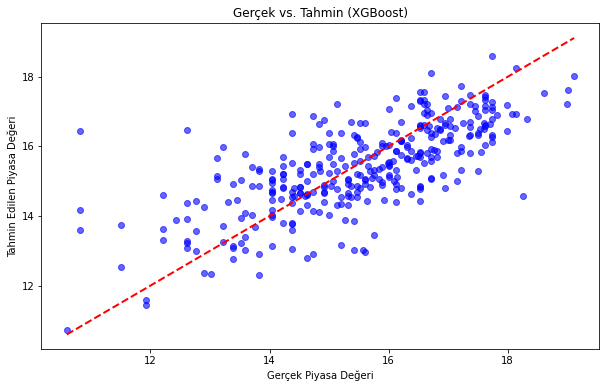

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Gerçek vs. Tahmin (XGBoost)')
plt.xlabel('Gerçek Piyasa Değeri')
plt.ylabel('Tahmin Edilen Piyasa Değeri')
plt.show()